# Ergodicity Basic Simulation - Results Analysis

In [1]:
# import re

# from pathlib import Path
# from PIL import Image

# results_dir = Path("results")
# pattern = "*Growth Rate*.png"
# image_paths = list(results_dir.glob(pattern))

# if not image_paths:
#     print(f"No PNG files found in {results_dir} matching pattern containing 'Growth Rate'.")
# else:
#     def natural_key(p):
#         # Split into text and number chunks for natural sort
#         return [int(t) if t.isdigit() else t.lower() for t in re.split(r'(\d+)', p.stem)]
#     image_paths.sort(key=natural_key)

#     frames = []
#     for p in image_paths:
#         try:
#             img = Image.open(p)
#             frames.append(img.convert("RGBA"))
#         except Exception as e:
#             print(f"Skipping {p}: {e}")

#     if len(frames) <= 1:
#         print("Need at least 2 frames to build an animation.")
#     else:
#         output_path = results_dir / "Growth Rate Animation.gif"
#         frames[0].save(
#             output_path,
#             save_all=True,
#             append_images=frames[1:],
#             duration=50,  # ms per frame
#             loop=0,        # 0 = infinite loop
#             disposal=2
#         )
#         print(f"Animated GIF saved to: {output_path} ({len(frames)} frames)")

In [2]:
# import pickle
# import re

# from pathlib import Path
# from PIL import Image

# from ergodic_insurance.monte_carlo import SimulationResults

# results_dir = Path("results")

# pkl_paths = sorted(results_dir.glob("*.pkl"))

# all_configurations = {}
# if not pkl_paths:
#     print(f"No pickle files found in {results_dir}.")
# else:
#     for path in pkl_paths:
#         try:
#             with open(path, "rb") as f:
#                 all_configurations[path.stem] = pickle.load(f)
#         except Exception as e:
#             print(f"Skipping {path.name}: {e}")
#     print(f"Loaded {len(all_configurations)} pickle files into all_configurations.")

In [3]:
# def get_object_methods(obj):
#     """
#     Returns a list of all callable methods of a given Python object,
#     excluding "dunder" (double underscore) methods.
#     """
#     methods = []
#     for name in dir(obj):
#         attribute = getattr(obj, name)
#         if callable(attribute) and not name.startswith("__"):
#             methods.append(name)
#     return methods


# one_configuration = all_configurations[0]

# print("Methods:", get_object_methods(one_configuration))

# print("Attributes:", one_configuration.__dict__.keys())

# print("Growth Rate:", one_configuration.growth_rates.mean())

# print("Risk of Ruin:", one_configuration.ruin_probability)

In [4]:
import pickle
import re

from pathlib import Path
from PIL import Image

from ergodic_insurance.monte_carlo import SimulationResults

def _parse_number(text):
    text = text.strip().replace(",", "")
    m = re.fullmatch(r'([+-]?\d+(?:\.\d+)?)([KMB])?$', text, re.I)
    if not m:
        # fallback: plain int/float or leave as-is
        try:
            return int(text)
        except ValueError:
            try:
                return float(text)
            except ValueError:
                return text
    num = float(m.group(1))
    mult = {"K": 1_000, "M": 1_000_000, "B": 1_000_000_000}.get((m.group(2) or "").upper(), 1)
    val = num * mult
    return int(val) if val.is_integer() else val


def parse_config_key(key: str) -> dict:
    parts = re.split(r"\s*-\s*", key.strip())
    out = {}
    for part in parts:
        if not part:
            continue

        # e.g. "Cap (100M)"
        m = re.match(r"^([A-Za-z_]+)\s*\(\s*([^)]+)\s*\)$", part)
        if m:
            out[m.group(1)] = _parse_number(m.group(2))
            continue

        # e.g. "0K Sims" or "50 Yrs"
        m = re.match(r"^([+-]?\d+(?:\.\d+)?)\s*([KMB])?\s*([A-Za-z_]+)$", part)
        if m:
            value = _parse_number((m.group(1) or "") + (m.group(2) or ""))
            out[m.group(3)] = value
            continue

        # flags like "NOINS"
        if part.upper() == "NOINS":
            out["NOINS"] = True

    return out

results_dir = Path("G:/My Drive/Colab Notebooks/results")

pkl_paths = sorted(results_dir.glob("*.pkl"))

all_configurations = {}
if not pkl_paths:
    print(f"No pickle files found in {results_dir}.")
else:
    for path in pkl_paths:
        try:
            with open(path, "rb") as f:
                one_config = pickle.load(f)
                growth_rate = one_config.growth_rates.mean()
                ror = one_config.ruin_probability
                all_configurations[path.stem] = {
                    "growth_rate": growth_rate,
                    "risk_of_ruin": ror
                }
        except Exception as e:
            print(f"Skipping {path.name}: {e}")
    print(f"Loaded {len(all_configurations)} pickle files into all_configurations.")

parsed_params_by_key = {k: parse_config_key(k) | all_configurations[k] for k in all_configurations.keys()}
parsed_params_by_key

Skipping Cap (10M) -    ATR (0.8) -    EBITABL (0.1) -    XS_Kurt (10938) -    Ded (50K) -    LR (0.6) -    100K Sims -    50 Yrs.pkl: [Errno 22] Invalid argument
Skipping Cap (10M) -    ATR (0.8) -    EBITABL (0.125) -    XS_Kurt (952839) -    NOINS -    100K Sims -    50 Yrs.pkl: [Errno 22] Invalid argument
Skipping Cap (10M) -    ATR (1.2) -    EBITABL (0.1) -    XS_Kurt (6209) -    Ded (500K) -    LR (0.8) -    100K Sims -    50 Yrs.pkl: [Errno 22] Invalid argument
Skipping Cap (10M) -    ATR (1.2) -    EBITABL (0.125) -    XS_Kurt (7611) -    NOINS -    100K Sims -    50 Yrs.pkl: [Errno 22] Invalid argument
Skipping Cap (25M) -    ATR (0.9) -    EBITABL (0.15) -    XS_Kurt (2397) -    Ded (0K) -    LR (0.7) -    100K Sims -    50 Yrs.pkl: [Errno 22] Invalid argument
Skipping Cap (25M) -    ATR (1.0) -    EBITABL (0.1) -    XS_Kurt (10353) -    Ded (500K) -    LR (0.8) -    100K Sims -    50 Yrs.pkl: [Errno 22] Invalid argument
Skipping Cap (25M) -    ATR (1.0) -    EBITABL (0.15) 

{'Cap (10M) -    ATR (0.8) -    EBITABL (0.1) -    XS_Kurt (10938) -    NOINS -    100K Sims -    50 Yrs': {'Cap': 10000000,
  'ATR': 0.8,
  'EBITABL': 0.1,
  'XS_Kurt': 10938,
  'NOINS': True,
  'Sims': 100000,
  'Yrs': 50,
  'growth_rate': np.float64(0.006338442682003591),
  'risk_of_ruin': {'5': 0.00524,
   '10': 0.01065,
   '15': 0.01619,
   '20': 0.02173,
   '25': 0.02676,
   '30': 0.03184,
   '35': 0.03687,
   '40': 0.0415,
   '45': 0.04576,
   '50': 0.04983}},
 'Cap (10M) -    ATR (0.8) -    EBITABL (0.1) -    XS_Kurt (14146) -    Ded (100K) -    LR (0.7) -    100K Sims -    50 Yrs': {'Cap': 10000000,
  'ATR': 0.8,
  'EBITABL': 0.1,
  'XS_Kurt': 14146,
  'Ded': 100000,
  'LR': 0.7,
  'Sims': 100000,
  'Yrs': 50,
  'growth_rate': np.float64(0.011503341868650168),
  'risk_of_ruin': {'5': 0.0,
   '10': 0.0,
   '15': 0.0,
   '20': 0.0,
   '25': 0.0,
   '30': 0.0,
   '35': 0.0,
   '40': 0.0,
   '45': 0.0,
   '50': 0.0}},
 'Cap (10M) -    ATR (0.8) -    EBITABL (0.1) -    XS_Kurt (141

In [12]:
error_pickle_list = [
    'Cap (10M) -    ATR (0.8) -    EBITABL (0.125) -    XS_Kurt (952839) -    NOINS -    100K Sims -    50 Yrs.pkl',
    'Cap (10M) -    ATR (1.2) -    EBITABL (0.1) -    XS_Kurt (6209) -    Ded (500K) -    LR (0.8) -    100K Sims -    50 Yrs.pkl',
    'Cap (10M) -    ATR (1.2) -    EBITABL (0.125) -    XS_Kurt (7611) -    NOINS -    100K Sims -    50 Yrs.pkl',
    'Cap (25M) -    ATR (0.9) -    EBITABL (0.15) -    XS_Kurt (2397) -    Ded (0K) -    LR (0.7) -    100K Sims -    50 Yrs.pkl',
    'Cap (10M) -    ATR (0.8) -    EBITABL (0.1) -    XS_Kurt (10938) -    Ded (50K) -    LR (0.6) -    100K Sims -    50 Yrs.pkl',
    'Cap (25M) -    ATR (1.0) -    EBITABL (0.1) -    XS_Kurt (10353) -    Ded (500K) -    LR (0.8) -    100K Sims -    50 Yrs.pkl',
    'Cap (25M) -    ATR (1.0) -    EBITABL (0.15) -    XS_Kurt (10505) -    NOINS -    100K Sims -    50 Yrs.pkl',
    'Cap (25M) -    ATR (1.0) -    EBITABL (0.15) -    XS_Kurt (3816128) -    Ded (250K) -    LR (0.7) -    100K Sims -    50 Yrs.pkl',
    'Cap (25M) -    ATR (1.0) -    EBITABL (0.15) -    XS_Kurt (6365) -    NOINS -    100K Sims -    50 Yrs.pkl',
    'Cap (25M) -    ATR (1.2) -    EBITABL (0.125) -    XS_Kurt (14616) -    Ded (0K) -    LR (0.8) -    100K Sims -    50 Yrs.pkl',
    'Cap (5M) -    ATR (0.9) -    EBITABL (0.1) -    XS_Kurt (2114) -    NOINS -    100K Sims -    50 Yrs.pkl',
    'Cap (5M) -    ATR (0.9) -    EBITABL (0.1) -    XS_Kurt (2361) -    Ded (50K) -    LR (0.6) -    100K Sims -    50 Yrs.pkl',
    'Cap (5M) -    ATR (1.1) -    EBITABL (0.125) -    XS_Kurt (1689) -    NOINS -    100K Sims -    50 Yrs.pkl',
    'Cap (5M) -    ATR (1.1) -    EBITABL (0.125) -    XS_Kurt (46400) -    Ded (250K) -    LR (0.6) -    100K Sims -    50 Yrs.pkl',
    'Cap (5M) -    ATR (1.1) -    EBITABL (0.15) -    XS_Kurt (2921) -    Ded (0K) -    LR (0.6) -    100K Sims -    50 Yrs.pkl',
    'Cap (5M) -    ATR (1.2) -    EBITABL (0.15) -    XS_Kurt (55801) -    Ded (50K) -    LR (0.7) -    100K Sims -    50 Yrs.pkl'
]

error_pickle_list
import pickle
import re

from pathlib import Path
from PIL import Image

from ergodic_insurance.monte_carlo import SimulationResults

def _parse_number(text):
    text = text.strip().replace(",", "")
    m = re.fullmatch(r'([+-]?\d+(?:\.\d+)?)([KMB])?$', text, re.I)
    if not m:
        # fallback: plain int/float or leave as-is
        try:
            return int(text)
        except ValueError:
            try:
                return float(text)
            except ValueError:
                return text
    num = float(m.group(1))
    mult = {"K": 1_000, "M": 1_000_000, "B": 1_000_000_000}.get((m.group(2) or "").upper(), 1)
    val = num * mult
    return int(val) if val.is_integer() else val


def parse_config_key(key: str) -> dict:
    parts = re.split(r"\s*-\s*", key.strip())
    out = {}
    for part in parts:
        if not part:
            continue

        # e.g. "Cap (100M)"
        m = re.match(r"^([A-Za-z_]+)\s*\(\s*([^)]+)\s*\)$", part)
        if m:
            out[m.group(1)] = _parse_number(m.group(2))
            continue

        # e.g. "0K Sims" or "50 Yrs"
        m = re.match(r"^([+-]?\d+(?:\.\d+)?)\s*([KMB])?\s*([A-Za-z_]+)$", part)
        if m:
            value = _parse_number((m.group(1) or "") + (m.group(2) or ""))
            out[m.group(3)] = value
            continue

        # flags like "NOINS"
        if part.upper() == "NOINS":
            out["NOINS"] = True

    return out

results_dir = Path("G:/My Drive/Colab Notebooks/results")

# Build concrete paths from the known filenames and report any missing files
pkl_paths = []
missing_files = []
for fname in error_pickle_list:
    p = results_dir / fname
    if p.exists():
        pkl_paths.append(p)
    else:
        missing_files.append(fname)
if missing_files:
    print(f"Missing {len(missing_files)} files under {results_dir}:")
    for mf in missing_files:
        print(f" - {mf}")

error_configurations = {}
if not pkl_paths:
    print(f"No pickle files found in {results_dir}.")
else:
    for path in pkl_paths:
        try:
            with open(path, "rb") as f:
                one_config = pickle.load(f)
                growth_rate = one_config.growth_rates.mean()
                ror = one_config.ruin_probability
                error_configurations[path.stem] = {
                    "growth_rate": growth_rate,
                    "risk_of_ruin": ror
                }
        except Exception as e:
            print(f"Skipping {path.name}: {e}")
    print(f"Loaded {len(error_configurations)} pickle files into all_configurations.")

parsed_params_by_key_errors = {k: parse_config_key(k) | error_configurations[k] for k in error_configurations.keys()}
parsed_params_by_key_errors

In [13]:
print("Parsed params by key:", len(parsed_params_by_key.keys()), "Parsed with errors:", len(parsed_params_by_key_errors.keys()))

Parsed params by key: 1333 Parsed with errors: 16


In [14]:
parsed_params_by_key = parsed_params_by_key | parsed_params_by_key_errors

In [15]:
print(f"Combined parsed params by key:", len(parsed_params_by_key.keys()))

Combined parsed params by key: 1349


In [16]:
out_path = "results/parsed_params_by_key.pkl"

with open(out_path, "wb") as f:
    pickle.dump(parsed_params_by_key, f, protocol=pickle.HIGHEST_PROTOCOL)
print(f"Saved: {out_path}")

Saved: results/parsed_params_by_key.pkl


In [17]:
noins_scenarios = {k: v for k, v in parsed_params_by_key.items() if v.get("NOINS")}

In [18]:
list(noins_scenarios.values())[0]

{'Cap': 10000000,
 'ATR': 0.8,
 'EBITABL': 0.1,
 'XS_Kurt': 10938,
 'NOINS': True,
 'Sims': 100000,
 'Yrs': 50,
 'growth_rate': np.float64(0.006338442682003591),
 'risk_of_ruin': {'5': 0.00524,
  '10': 0.01065,
  '15': 0.01619,
  '20': 0.02173,
  '25': 0.02676,
  '30': 0.03184,
  '35': 0.03687,
  '40': 0.0415,
  '45': 0.04576,
  '50': 0.04983}}

Saved: results\option3_multiples_ebit_0.100.png
Saved: results\option3_multiples_ebit_0.125.png
Saved: results\option3_multiples_ebit_0.150.png


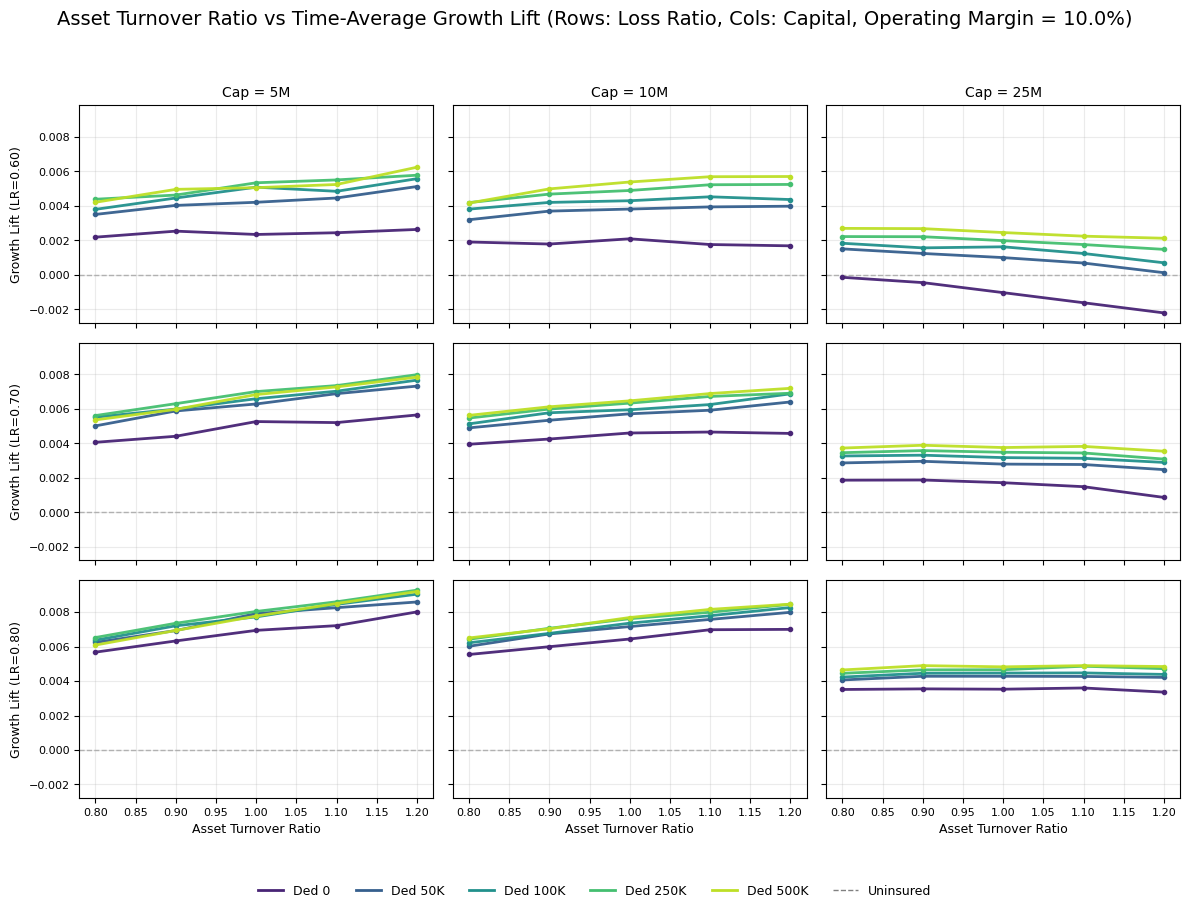

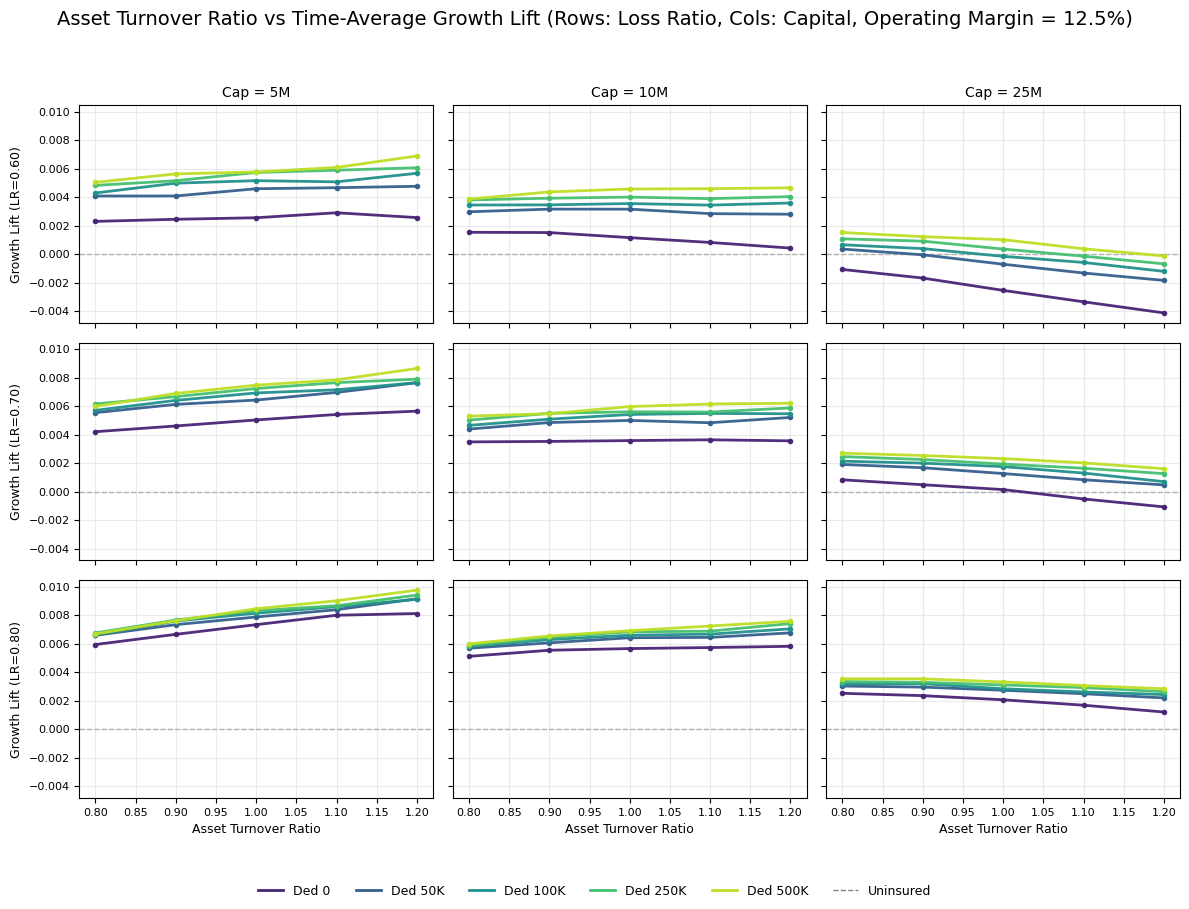

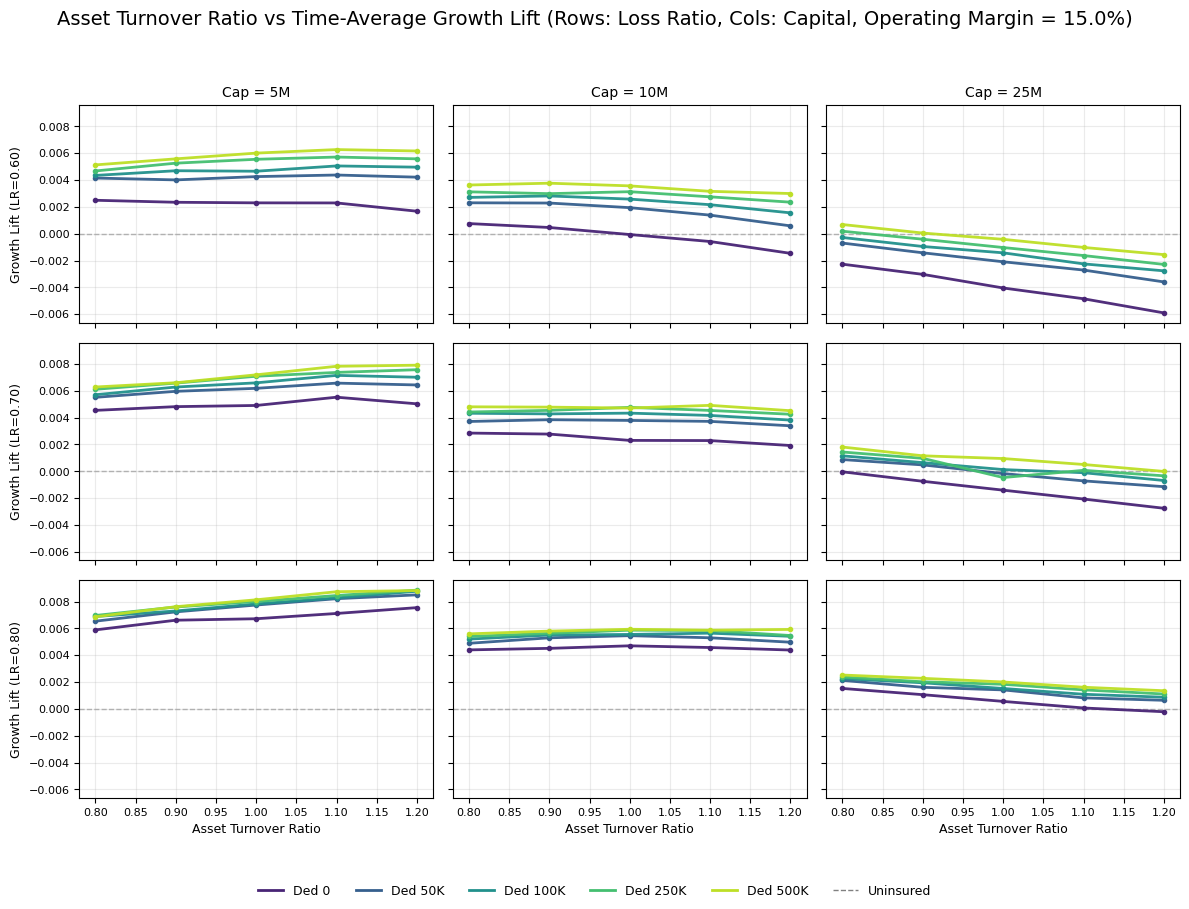

Created 3 figures for Option 3


In [19]:
# Option 3: Small multiples with discrete operating margin values
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from pathlib import Path
from collections import defaultdict

all_scens = parsed_params_by_key | noins_scenarios

if not isinstance(globals().get("all_scens"), dict) or not all_scens:
    raise RuntimeError("all_scens is missing or empty.")

def to_float(x):
    try:
        return float(x)
    except Exception:
        return np.nan

# Parse scenarios
sc_list = []
for k, v in all_scens.items():
    cap = to_float(v.get("Cap"))
    atr = to_float(v.get("ATR"))
    ebit = to_float(v.get("EBITABL"))
    gr = to_float(v.get("growth_rate"))
    ded = to_float(v.get("Ded"))
    lr_raw = v.get("LR", np.nan)
    lr_f = to_float(lr_raw)
    if np.isfinite(lr_f) and lr_f > 1.0:
        lr_f = lr_f / 100.0
    noins = bool(v.get("NOINS", False))

    if not np.isfinite(cap) or not np.isfinite(gr) or not np.isfinite(atr) or not np.isfinite(ebit):
        continue
    if not noins and not np.isfinite(ded):
        continue
    
    sc_list.append({
        "cap": cap,
        "atr": atr,
        "ebit": ebit,
        "ded": ded,
        "lr": lr_f if np.isfinite(lr_f) else np.nan,
        "noins": noins,
        "gr": gr
    })

if not sc_list:
    raise RuntimeError("No usable scenarios after filtering.")

sc_list

def fmt_amount(n):
    n = float(n)
    if n >= 1_000_000_000: return f"{n/1_000_000_000:.0f}B"
    if n >= 1_000_000:     return f"{n/1_000_000:.0f}M"
    if n >= 1_000:         return f"{n/1_000:.0f}K"
    return f"{n:.0f}"

def ded_label(d):
    d = float(d)
    if d >= 1_000_000_000: return f"Ded {d/1_000_000_000:.0f}B"
    if d >= 1_000_000:     return f"Ded {d/1_000_000:.0f}M"
    if d >= 1_000:         return f"Ded {d/1_000:.0f}K"
    return f"Ded {d:.0f}"

# Choose 3 LR levels, 5 Cap levels, and 3-4 EBIT levels
ins_rows = [s for s in sc_list if not s["noins"] and np.isfinite(s["lr"])]
if not ins_rows:
    raise RuntimeError("No insurance scenarios with LR available.")

unique_lr = np.unique(np.round([s["lr"] for s in ins_rows], 3))
preferred_lr = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
lr_levels = [lvl for lvl in preferred_lr if np.any(np.isclose(unique_lr, lvl, atol=1e-3))]
if len(lr_levels) < 3:
    for u in unique_lr:
        if not any(np.isclose(u, l, atol=1e-3) for l in lr_levels):
            lr_levels.append(float(u))
        if len(lr_levels) >= 3:
            break
lr_levels = lr_levels[:3]

caps_all = sorted(np.unique([s["cap"] for s in sc_list]))
if len(caps_all) <= 5:
    cap_levels = caps_all
else:
    idxs = np.round(np.linspace(0, len(caps_all) - 1, 5)).astype(int)
    cap_levels = [caps_all[i] for i in idxs]
cap_levels = cap_levels[:5]

# EBIT levels: choose 3-4 evenly spaced values
ebit_all = sorted(np.unique([s["ebit"] for s in sc_list]))
ebit_levels = ebit_all

# Deductible levels
ded_uni = sorted(np.unique([s["ded"] for s in ins_rows]))
ded_levels = ded_uni

cmap = plt.cm.viridis
ded_colors = cmap(np.linspace(0.1, 0.9, max(1, len(ded_levels))))

# Build baseline (NOINS) for each (Cap, EBIT, ATR) combination
baseline_map = {}  # baseline_map[(cap, ebit, atr)] = growth_rate
for s in sc_list:
    if s["noins"]:
        key = (s["cap"], round(s["ebit"], 6), round(s["atr"], 6))
        baseline_map[key] = s["gr"]

# Create 3D grid: nrows (LR) × ncols (Cap) × n_ebit_panels (EBIT)
# We'll use a single large figure with subplots arranged as: 
# Outer grid = LR (rows) × EBIT (columns within each LR)
# Inner grid = Cap (columns within each EBIT panel)

# Actually, let's make it: nrows=LR, ncols=Cap, and create separate figures for each EBIT
# OR: nrows=LR, ncols=Cap*EBIT (nested)

# For simplicity, let's create: nrows=LR, ncols=EBIT, and use different Cap as separate line styles or colors
# Actually, the cleanest is: create a mega-grid with LR × (Cap × EBIT)

# Let's use a simpler approach: LR rows, Cap columns, and create multiple figures (one per EBIT)
# OR: LR rows, EBIT super-columns (with Cap sub-columns inside)

# Most readable: Create separate figures for each EBIT level
for ebit_idx, ebit_val in enumerate(ebit_levels):
    nrows = len(lr_levels)
    ncols = len(cap_levels)
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(4.0*ncols, 3.0*nrows), 
                             sharex=True, sharey=True)
    if nrows == 1 and ncols == 1:
        axes = np.array([[axes]])
    elif nrows == 1:
        axes = np.array([axes])
    elif ncols == 1:
        axes = axes[:, np.newaxis]
    
    for j, cap in enumerate(cap_levels):
        axes[0, j].set_title(f"Cap = {fmt_amount(cap)}", fontsize=10)
    for i, lr in enumerate(lr_levels):
        axes[i, 0].set_ylabel(f"Growth Lift (LR={lr:.2f})", fontsize=9)
    
    for i, lr in enumerate(lr_levels):
        for j, cap in enumerate(cap_levels):
            ax = axes[i, j]
            ax.axhline(0.0, color="gray", lw=1.0, ls="--", alpha=0.6, zorder=1)
            
            for color, dval in zip(ded_colors, ded_levels):
                # Collect points for this (lr, cap, ebit, ded)
                atrs_list = []
                deltas_list = []
                
                for s in sc_list:
                    if (not s["noins"]
                        and np.isfinite(s["lr"]) and np.isclose(s["lr"], lr, atol=1e-3)
                        and np.isclose(s["cap"], cap, atol=1e-9)
                        and np.isclose(s["ebit"], ebit_val, atol=1e-6)
                        and np.isclose(s["ded"], dval, atol=1e-9)):
                        
                        key_atr = round(s["atr"], 6)
                        baseline_key = (cap, round(ebit_val, 6), key_atr)
                        if baseline_key in baseline_map:
                            baseline_gr = baseline_map[baseline_key]
                            delta = s["gr"] - baseline_gr
                            atrs_list.append(s["atr"])
                            deltas_list.append(delta)
                
                if not atrs_list:
                    continue
                
                # Sort by ATR
                atrs_arr = np.array(atrs_list)
                deltas_arr = np.array(deltas_list)
                order = np.argsort(atrs_arr)
                
                ax.plot(atrs_arr[order], deltas_arr[order], 
                       color=color, lw=2.0, alpha=0.95, 
                       marker='o', ms=3, label=ded_label(dval), zorder=3)
            
            if i == nrows - 1:
                ax.set_xlabel("Asset Turnover Ratio", fontsize=9)
            ax.grid(True, alpha=0.25)
            ax.tick_params(labelsize=8)
    
    # Legend
    legend_elems = [Line2D([0], [0], color=ded_colors[k], lw=2.0, 
                           label=ded_label(ded_levels[k]))
                    for k in range(len(ded_levels))]
    legend_elems.append(Line2D([0], [0], color="gray", lw=1.0, ls="--", 
                               label="Uninsured"))
    fig.legend(legend_elems, [h.get_label() for h in legend_elems],
               loc="lower center", ncol=min(6, len(legend_elems)), 
               frameon=False, fontsize=9)
    
    fig.suptitle("Asset Turnover Ratio vs Time-Average Growth Lift " + 
                 f"(Rows: Loss Ratio, Cols: Capital, Operating Margin = {ebit_val:.1%})",
                 y=0.995, fontsize=14)
    fig.tight_layout(rect=[0, 0.06, 1, 0.965])
    
    results_dir = Path("results")
    results_dir.mkdir(parents=True, exist_ok=True)
    out = results_dir / f"option3_multiples_ebit_{ebit_val:.3f}.png"
    fig.savefig(out, dpi=300)
    print(f"Saved: {out}")

plt.show()
print(f"Created {len(ebit_levels)} figures for Option 3")